# Parte 1 — Simulación del movimiento browniano

Edgardo González Tejeda

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)   # Para reproducibilidad

n_simulaciones = 5000
n_pasos = 252
horizontes = [0.25, 0.5, 1, 2]


In [3]:
resultados_finales = {}

for T in horizontes:
    dt = T / n_pasos
    
    # Incrementos normales con media 0 y varianza dt
    incrementos = np.random.normal(
        loc=0,
        scale=np.sqrt(dt),
        size=(n_simulaciones, n_pasos)
    )
    
    # Movimiento browniano: suma acumulada
    W = np.cumsum(incrementos, axis=1)
    
    # Guardamos solo el valor final W_T
    resultados_finales[T] = W[:, -1]


In [4]:
for T in horizontes:
    print(f"T = {T} | Media: {np.mean(resultados_finales[T]):.4f}")


T = 0.25 | Media: -0.0114
T = 0.5 | Media: 0.0057
T = 1 | Media: -0.0063
T = 2 | Media: 0.0178


La simulación sí cumple con la propiedad de media cero del movimiento browniano.

# Parte 2 — Visualización de las distribuciones finales

In [5]:
resultados_finales


{0.25: array([-0.02988275,  0.200565  , -0.60941967, ...,  0.02796284,
        -0.44720135,  0.05792966], shape=(5000,)),
 0.5: array([-0.54691492, -0.52081867,  0.78074647, ..., -0.34729964,
         0.40528971, -0.77638195], shape=(5000,)),
 1: array([ 0.7793125 , -0.99723113,  1.41231362, ...,  0.80709893,
         0.39526652,  1.81815887], shape=(5000,)),
 2: array([-0.14536603, -0.86504211,  0.84818993, ..., -0.58899646,
        -1.08066065, -0.92902277], shape=(5000,))}

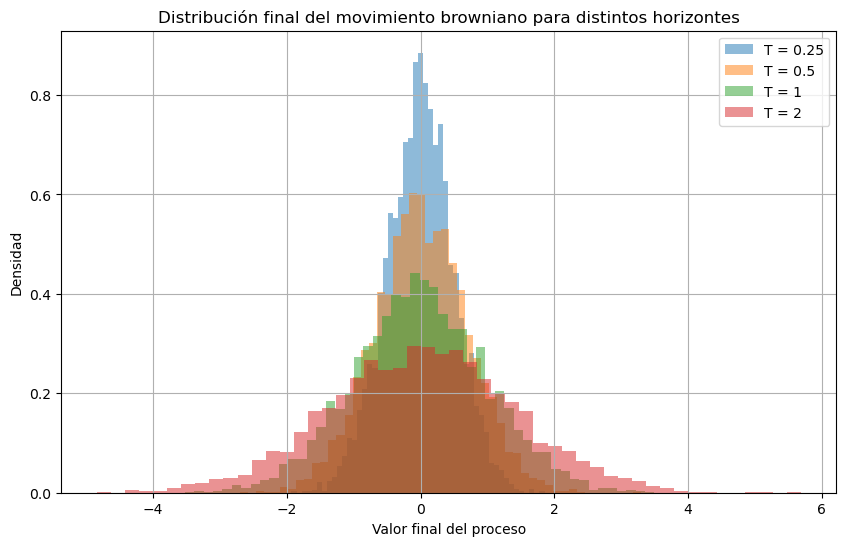

In [6]:
plt.figure(figsize=(10, 6))

for T, valores in resultados_finales.items():
    plt.hist(
        valores,
        bins=50,
        alpha=0.5,
        density=True,
        label=f"T = {T}"
    )

plt.title("Distribución final del movimiento browniano para distintos horizontes")
plt.xlabel("Valor final del proceso")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)

plt.show()


# Parte 3 — Análisis cuantitativo

In [7]:
estadisticas = []

for T, valores in resultados_finales.items():
    media = np.mean(valores)
    varianza = np.var(valores)
    desviacion = np.std(valores)
    
    estadisticas.append([T, media, varianza, desviacion])

# Convertimos a arreglo para imprimir bonito
estadisticas = np.array(estadisticas)

estadisticas


array([[ 0.25      , -0.01137286,  0.24780892,  0.4978041 ],
       [ 0.5       ,  0.00571107,  0.48639723,  0.69742185],
       [ 1.        , -0.0063464 ,  0.99173826,  0.99586056],
       [ 2.        ,  0.01784377,  1.92640214,  1.3879489 ]])

In [8]:
for fila in estadisticas:
    print(f"T = {fila[0]} | Media = {fila[1]:.4f} | Varianza = {fila[2]:.4f} | Desv. Std = {fila[3]:.4f}")


T = 0.25 | Media = -0.0114 | Varianza = 0.2478 | Desv. Std = 0.4978
T = 0.5 | Media = 0.0057 | Varianza = 0.4864 | Desv. Std = 0.6974
T = 1.0 | Media = -0.0063 | Varianza = 0.9917 | Desv. Std = 0.9959
T = 2.0 | Media = 0.0178 | Varianza = 1.9264 | Desv. Std = 1.3879


# Parte 4 — Preguntas de análisis



**1. ¿Cómo cambia la dispersión de la distribución al aumentar el horizonte temporal?**

Cuando el horizonte temporal aumenta, la distribución se vuelve más amplia. En la gráfica se observa que para valores pequeños de T los resultados están más concentrados y, conforme T crece, los valores se dispersan más, lo que indica mayor incertidumbre en el proceso.

**2. ¿La media del proceso depende del tiempo?**

No. La media se mantiene cercana a cero en todos los horizontes analizados. Las pequeñas variaciones que aparecen se deben al carácter aleatorio de la simulación, pero no a un cambio real en el promedio.

**3. ¿Qué relación observas entre la varianza y el tiempo?**

La varianza aumenta conforme aumenta el tiempo. Al comparar los resultados, se observa que a mayor horizonte temporal corresponde una mayor varianza, y este crecimiento es aproximadamente proporcional al valor de T.

**4. Si el horizonte temporal se cuadruplica, ¿qué ocurre aproximadamente con la desviación estándar?**

Cuando el horizonte temporal se cuadruplica, la desviación estándar aproximadamente se duplica, ya que esta crece con la raíz cuadrada del tiempo y no de manera lineal.

**5. ¿Qué implicaciones tiene este comportamiento para el riesgo financiero a distintos horizontes?**

Este comportamiento implica que el riesgo aumenta conforme el horizonte temporal es mayor. Aunque el valor promedio no cambia, la incertidumbre sobre los posibles resultados crece, lo que en finanzas significa mayor riesgo a plazos más largos.
